<a href="https://colab.research.google.com/github/ZiyueNie/FM/blob/master/src/572_hw1_2_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/wqiu96/19ma573WenhaoQIU

Cloning into '19ma573WenhaoQIU'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 183 (delta 9), reused 0 (delta 0), pack-reused 147
Receiving objects: 100% (183/183), 323.70 KiB | 9.52 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [3]:
cd 19ma573WenhaoQIU/src/

/content/19ma573WenhaoQIU/src


In [0]:
import BSM
import pandas as pd
import scipy.optimize as so
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as ss

def error_function(vol, gbm, option):
  gbm.vol_ratio = vol
  return (option.market_price - gbm.bsm_price(option))**2

def implied_volatility(gbm,option): 
  init_vol=0.1 #initial guess
  return so.fmin(error_function, init_vol, args = (gbm, option), disp = 0)[0]

def implied_volatility_list(S0,interest_rate,sigma_H,sigma_L,otype,strike_prices, maturity_time):
  gbm1= BSM.Gbm(init_state = S0,
                 drift_ratio = interest_rate,
               )
  
  option=[]
  for i in range(len(strike_prices)):
    option1= BSM.VanillaOption(
      otype = otype, # 1: 'call'
                # -1: 'put'
      strike = strike_prices[i],                
      maturity = maturity_time,
      market_price=SVM(S0,interest_rate,sigma_H,sigma_L,otype,strike_prices[i], maturity_time)
      )
    option.append(option1)

  #compute implied vols
  implied_volatility_me=[]
  for i in range(len(option)):
      implied_volatility_me.append(implied_volatility(gbm1,option[i]))
  return implied_volatility_me

def SVM(S0,interest_rate,sigma_H,sigma_L,otype,strike_prices, maturity_time):
    gbm1= BSM.Gbm(init_state = S0,
            drift_ratio = interest_rate,
            vol_ratio = sigma_H
               )
    gbm2= BSM.Gbm(init_state = S0,
            drift_ratio = interest_rate,
            vol_ratio = sigma_L
               )
    option1= BSM.VanillaOption(
      otype = otype, # 1: 'call'
                # -1: 'put'
      strike = strike_prices,                
      maturity = maturity_time,
      )
    return (1/2)*BSM.bsm_price(gbm1,option1)+(1/2)*BSM.bsm_price(gbm2,option1)

def delta(s0,strike_prices,r,sigma,maturity,otype):
  delta=[]
  for i in range(len(sigma)):
    d1 = (np.log(s0 / strike_prices[i]) + (r + 0.5 * sigma[i] ** 2)* maturity) / (sigma[i] * np.sqrt(maturity))
    delta.append(ss.norm.cdf(otype * d1))
  return delta



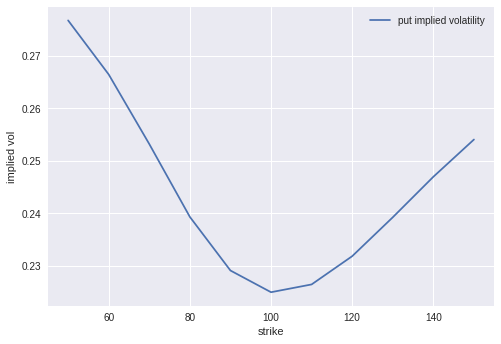

In [26]:
'''=================
Problem2_1
================='''
strike_price=[i for i in range(50,160,10)] #K
call_implied_volatility=implied_volatility_list(100,0.02,0.3,0.15,1,strike_price,1)
put_implied_volatility=implied_volatility_list(100,0.02,0.3,0.15,,strike_price,1)
#plt.plot(strike_price,call_implied_volatility,label='call implied volatility')
plt.plot(strike_price,put_implied_volatility,label='put implied volatility')
plt.ylabel('implied vol')
plt.xlabel('strike')
plt.legend()
plt.show()



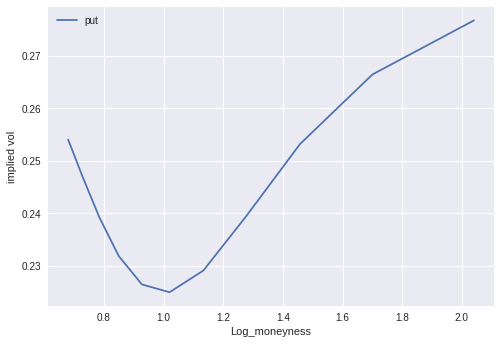

In [28]:
'''===============
Problem2_2
================='''
S0=100
r=0.02
maturity_time=1
#plt.plot(S0/((np.exp(-r*maturity_time))*np.array(strike_price)),call_implied_volatility,label='call')
plt.plot(S0/((np.exp(-r*maturity_time))*np.array(strike_price)),put_implied_volatility,label='put')
plt.ylabel('implied vol')
plt.xlabel('Log_moneyness')
plt.legend()
plt.show()


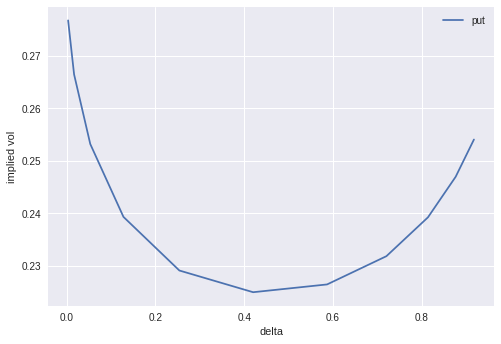

In [30]:
'''Problem1_3 call
================='''
#plt.plot(delta(S0,strike_price,r,call_implied_volatility,maturity_time,1),call_implied_volatility,label='call')
plt.plot(delta(S0,strike_price,r,put_implied_volatility,maturity_time,-1),put_implied_volatility,label='put')
plt.ylabel('implied vol')
plt.xlabel('delta')
plt.legend()
plt.show()
